In [295]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
from sklearn.mixture import GaussianMixture

In [235]:
data = pd.read_csv('hw3_Q5.txt', delimiter=' ', names=['d1', 'd2', 'd3', 'd4', 'd5', 'dummy'])
data = data.iloc[:,0:5]

### 1. Compute means and standard deviations

In [372]:
# mean 
gm = GaussianMixture(n_components=3, covariance_type='spherical', init_params='random').fit(data)
model = gm.fit(data)
mu = model.means_
mu

array([[-3.06176428e+00, -3.96696240e+00, -5.02048769e+00,
        -5.02021252e+00, -6.00420335e+00],
       [ 1.05250251e-02,  4.16618640e-03,  1.35683863e-02,
         1.00207924e-02, -2.47443547e-02],
       [ 2.99520441e+00,  3.97929290e+00,  4.93552594e+00,
         4.95000613e+00,  6.02926365e+00]])

In [373]:
# Standard deviation
cov = model.covariances_
np.sqrt(cov)

array([0.98486347, 0.49584492, 0.98920077])

In [374]:
pi = model.weights_
pi

array([0.33333333, 0.33333333, 0.33333333])

### 2. How many iterations did it take? How many iterations did K-Means take?

In [375]:
gm_kmean = GaussianMixture(n_components=3, covariance_type='spherical')
model_kmean = gm_kmean.fit(data)
# kmeans iteration
model_kmean.n_iter_

2

In [376]:
# random iteration
model.n_iter_

8

### 3. Plot clusters

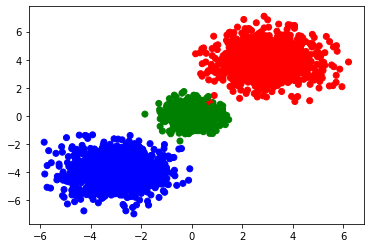

In [377]:
# x1 and x2
labels = gm.predict(data)
colors = ['blue','green','red']
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c = labels, cmap = matplotlib.colors.ListedColormap(colors));

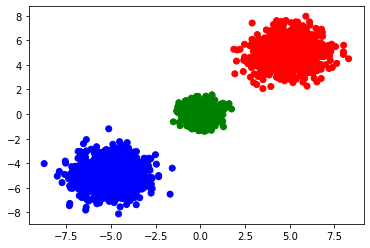

In [378]:
# x3 and x4
plt.scatter(data.iloc[:, 2], data.iloc[:, 3], c = labels, cmap = matplotlib.colors.ListedColormap(colors));

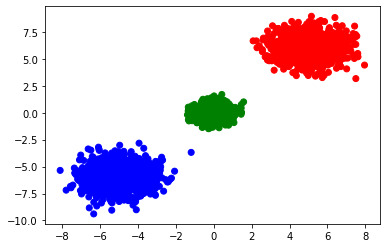

In [379]:
# x4 and x5
plt.scatter(data.iloc[:, 3], data.iloc[:, 4], c = labels, cmap = matplotlib.colors.ListedColormap(colors));

The computed means are consistent with the graphs.

### 4. Write EM on your own to estimate the means (assume other parameters are known)

In [417]:
# Initialize
clusters = []
m = [[-5]*5, [0]*5, [5]*5]
for i in range(3):
    clusters.append({
        "mu" : np.array(m[i]),
        "cov" : np.identity(5)*cov[i],
        "pi" : pi[i]
    })

In [418]:
N = data.shape[0]
K = 3
from scipy.stats import multivariate_normal
for epoch in range(100):
    #E-step
    b = np.zeros((N,K))
    r = np.zeros((N,K))
    for j in range(K):
        for i in range(N):
            b[i,j] = clusters[j]["pi"] * multivariate_normal.pdf(np.array(data.iloc[i,:]), clusters[j]["mu"], clusters[j]["cov"])
    
    #M-step
    r_total = np.zeros(N)
    m = np.zeros(K)
    for i in range(N):
        r_total[i] = sum(b[i,:])
    for i in range(N):
        for j in range(K):
            r[i,j] = b[i,j]/r_total[i]
    
    for j in range(K):
        m[j] = sum(r[:,j])
    
    new_mu = np.zeros((K,5))
    test = 0
    for j in range(K):
        for i in range(N):
            new_mu[j,:] += r[i,j]*np.array(data.iloc[i,:])/m[j]
            
    
    #likelihood 
    L = 0
    for i in range(N):
        L += np.log(r_total[i])
    

    if L<=0.001:
        break
    else:
        for j in range(K):
            clusters[j]["mu"] = new_mu[j,:]



In [419]:
new_mu

array([[-3.06176428e+00, -3.96696240e+00, -5.02048769e+00,
        -5.02021252e+00, -6.00420335e+00],
       [ 1.05250251e-02,  4.16618640e-03,  1.35683863e-02,
         1.00207924e-02, -2.47443547e-02],
       [ 2.99520441e+00,  3.97929290e+00,  4.93552594e+00,
         4.95000613e+00,  6.02926365e+00]])

### 5. Write EM on your own to estimate the means and pi (assume other parameters are known)

In [427]:
# Initialize
clusters = []
m = [[-5]*5, [0]*5, [5]*5]
p = [0.3,0.4,0.3]
for i in range(3):
    clusters.append({
        "mu" : np.array(m[i]),
        "cov" : np.identity(5)*cov[i],
        "pi" : p[i]
    })

In [428]:
N = data.shape[0]
K = 3
from scipy.stats import multivariate_normal
for epoch in range(100):
    
    #E-step
    b = np.zeros((N,K))
    r = np.zeros((N,K))
    for j in range(K):
        for i in range(N):
            b[i,j] = clusters[j]["pi"] * multivariate_normal.pdf(np.array(data.iloc[i,:]), clusters[j]["mu"], clusters[j]["cov"])
    
    #M-step
    r_total = np.zeros(N)
    m = np.zeros(K)
    for i in range(N):
        r_total[i] = sum(b[i,:])
    for i in range(N):
        for j in range(K):
            r[i,j] = b[i,j]/r_total[i]
    
    new_pi = np.zeros(K)
    for j in range(K):
        m[j] = sum(r[:,j])
    m_total = sum(m)
    new_pi = m/m_total
    
    new_mu = np.zeros((K,5))
    
    test = 0
    for j in range(K):
        for i in range(N):
            new_mu[j,:] += r[i,j]*np.array(data.iloc[i,:])/m[j]
            
    
    #likelihood 
    L = 0
    for i in range(N):
        L += np.log(r_total[i])
    

    if L<=0.001:
        break
    else:
        for j in range(K):
            clusters[j]["mu"] = new_mu[j,:]
            clusters[j]["pi"] = new_pi[j]


In [429]:
new_pi

array([0.33333333, 0.33333333, 0.33333333])

In [430]:
new_mu

array([[-3.06176428e+00, -3.96696240e+00, -5.02048769e+00,
        -5.02021252e+00, -6.00420335e+00],
       [ 1.05250251e-02,  4.16618640e-03,  1.35683863e-02,
         1.00207924e-02, -2.47443547e-02],
       [ 2.99520441e+00,  3.97929290e+00,  4.93552594e+00,
         4.95000613e+00,  6.02926365e+00]])